# Student Alcohol Consumption
Social, gender and study data from secondary school students

https://www.kaggle.com/uciml/student-alcohol-consumption/home

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style; style.use('ggplot')
plt.rcParams['figure.figsize'] = [8, 6]

In [234]:
# -mat: math course, -por: portugese course
mat = pd.read_csv('data/student-mat.csv')
por = pd.read_csv('data/student-por.csv')

In [235]:
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [236]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [237]:
mat.values.shape, por.values.shape

((395, 33), (649, 33))

The Portugese class has data on more students -- I'll start by investigating it alone.

## Exploratory Data Analysis

In [238]:
list(por)

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [239]:
(pd.isna(por).values == True).any()

False

Yay! No missing values

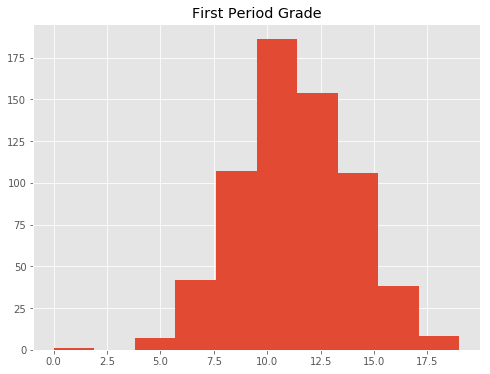

In [240]:
por.G1.hist()
plt.title('First Period Grade');

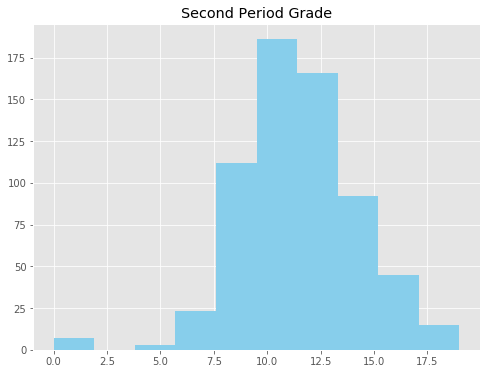

In [241]:
por.G2.hist(color='skyblue')
plt.title('Second Period Grade');

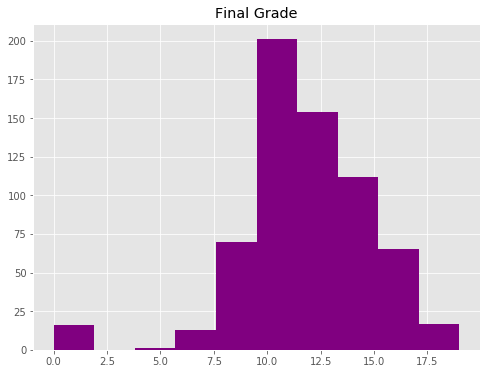

In [242]:
por.G3.hist(color='purple')
plt.title('Final Grade');

In [243]:
# Categorical data should sum to 649 to account for all students (assuming no missing values)
np.sum(por.sex == 'F'), np.sum(por.sex == 'M')

(383, 266)

More girls than boys in Portugese class!

In [244]:
np.sum(por.school == 'GP'), np.sum(por.school == 'MS') 

(423, 226)

Almost twice as many students go to Gabriel Pereira school vs Mousinho da Silveira

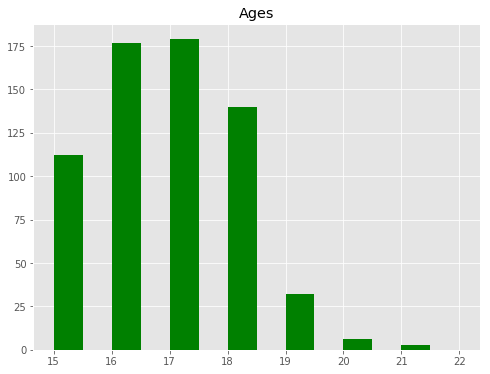

In [245]:
por.age.hist(bins=(22 - 15), width=0.5, color='green')
plt.title('Ages');

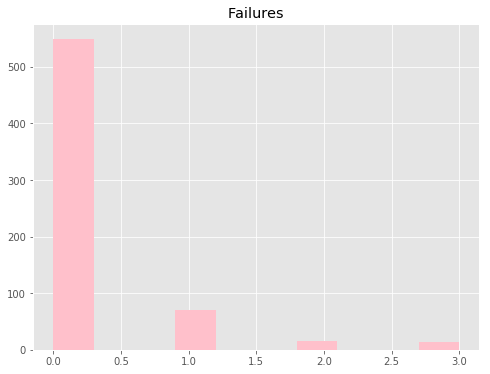

In [246]:
por.failures.hist(color='pink')
plt.title('Failures');

I'm not going to create a histogram for each feature. The basic ones are shown above.

Let's look at some correlations between features:

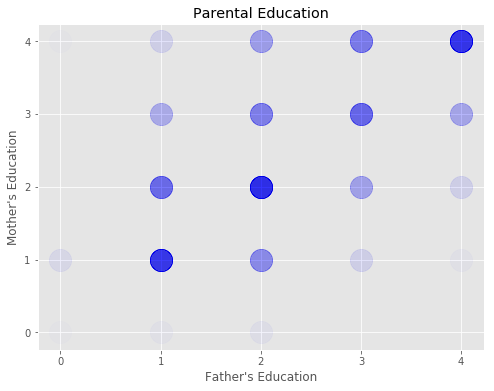

In [247]:
plt.scatter(por.Fedu, por.Medu, alpha=0.01, color='blue', s=500)
plt.xticks([0, 1, 2, 3, 4]); plt.yticks([0, 1, 2, 3, 4])
plt.title("Parental Education")
plt.xlabel("Father's Education")
plt.ylabel("Mother's Education");

Generally, a couple will have the same level of education. However, it seems that fathers 'marry up' more than mothers do -- fathers seem to marry women with a higher level of education more often than the converse. 

Let's see if this is actually true:

In [248]:
# Expect this number to be positive
par_edu = por.Medu - por.Fedu
sum(par_edu)

135

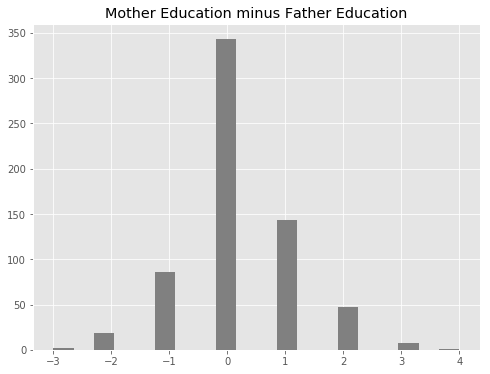

In [249]:
plt.hist(par_edu, color='gray', bins=20)
plt.title('Mother Education minus Father Education');

In [250]:
np.sum(por.Medu > por.Fedu), np.sum(por.Medu < por.Fedu)

(199, 107)

These results confirm my  suspicion. There are more parent couples in which the mother is more highly educated than the father.

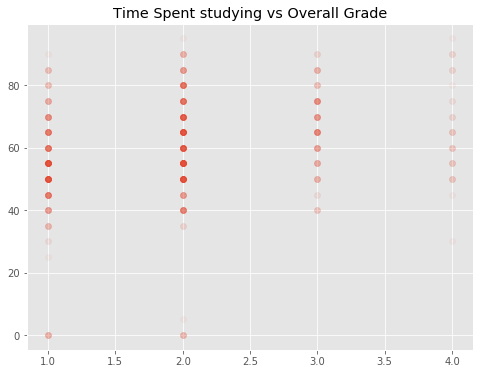

In [251]:
# Study time vs final grade (G3)
plt.scatter(por.studytime, por.G3 * 5, alpha=0.05)
plt.title('Time Spent studying vs Overall Grade');

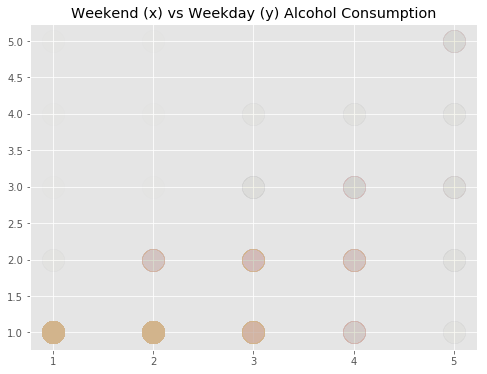

In [252]:
plt.scatter(por.Walc, por.Dalc, alpha=0.01, s=500, color='tan')
plt.xticks([i for i in range(1, 6)]);
plt.title('Weekend (x) vs Weekday (y) Alcohol Consumption');

## Feature Selection and Preprocessing

## Linear Regression Model